 Dataset Selection and Initial Analysis

Exploratory Data Analysis for: Iris Dataset

Summary Statistics:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


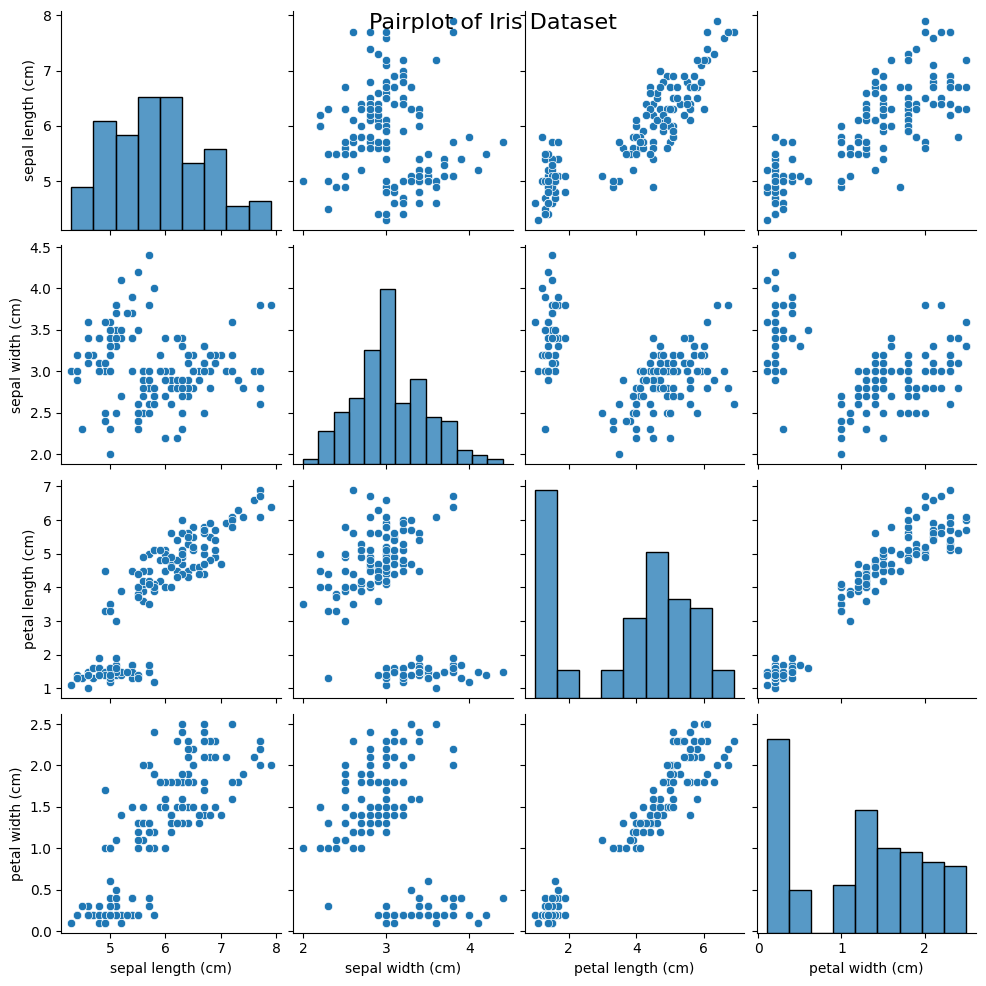

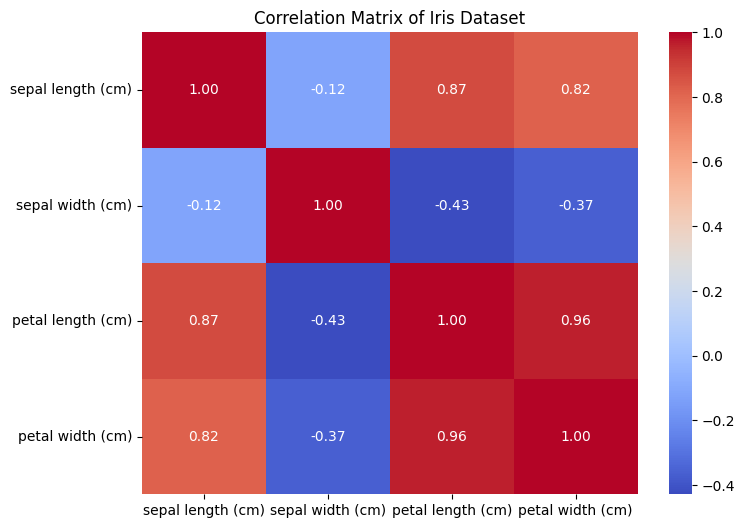

<Figure size 1000x600 with 0 Axes>

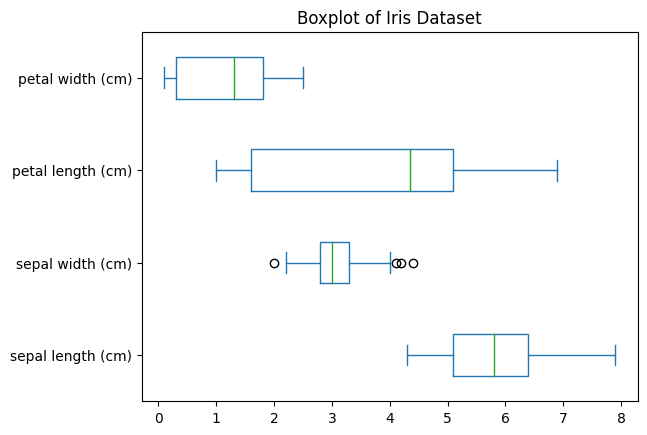

Exploratory Data Analysis for: Wholesale Customers Dataset

Summary Statistics:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


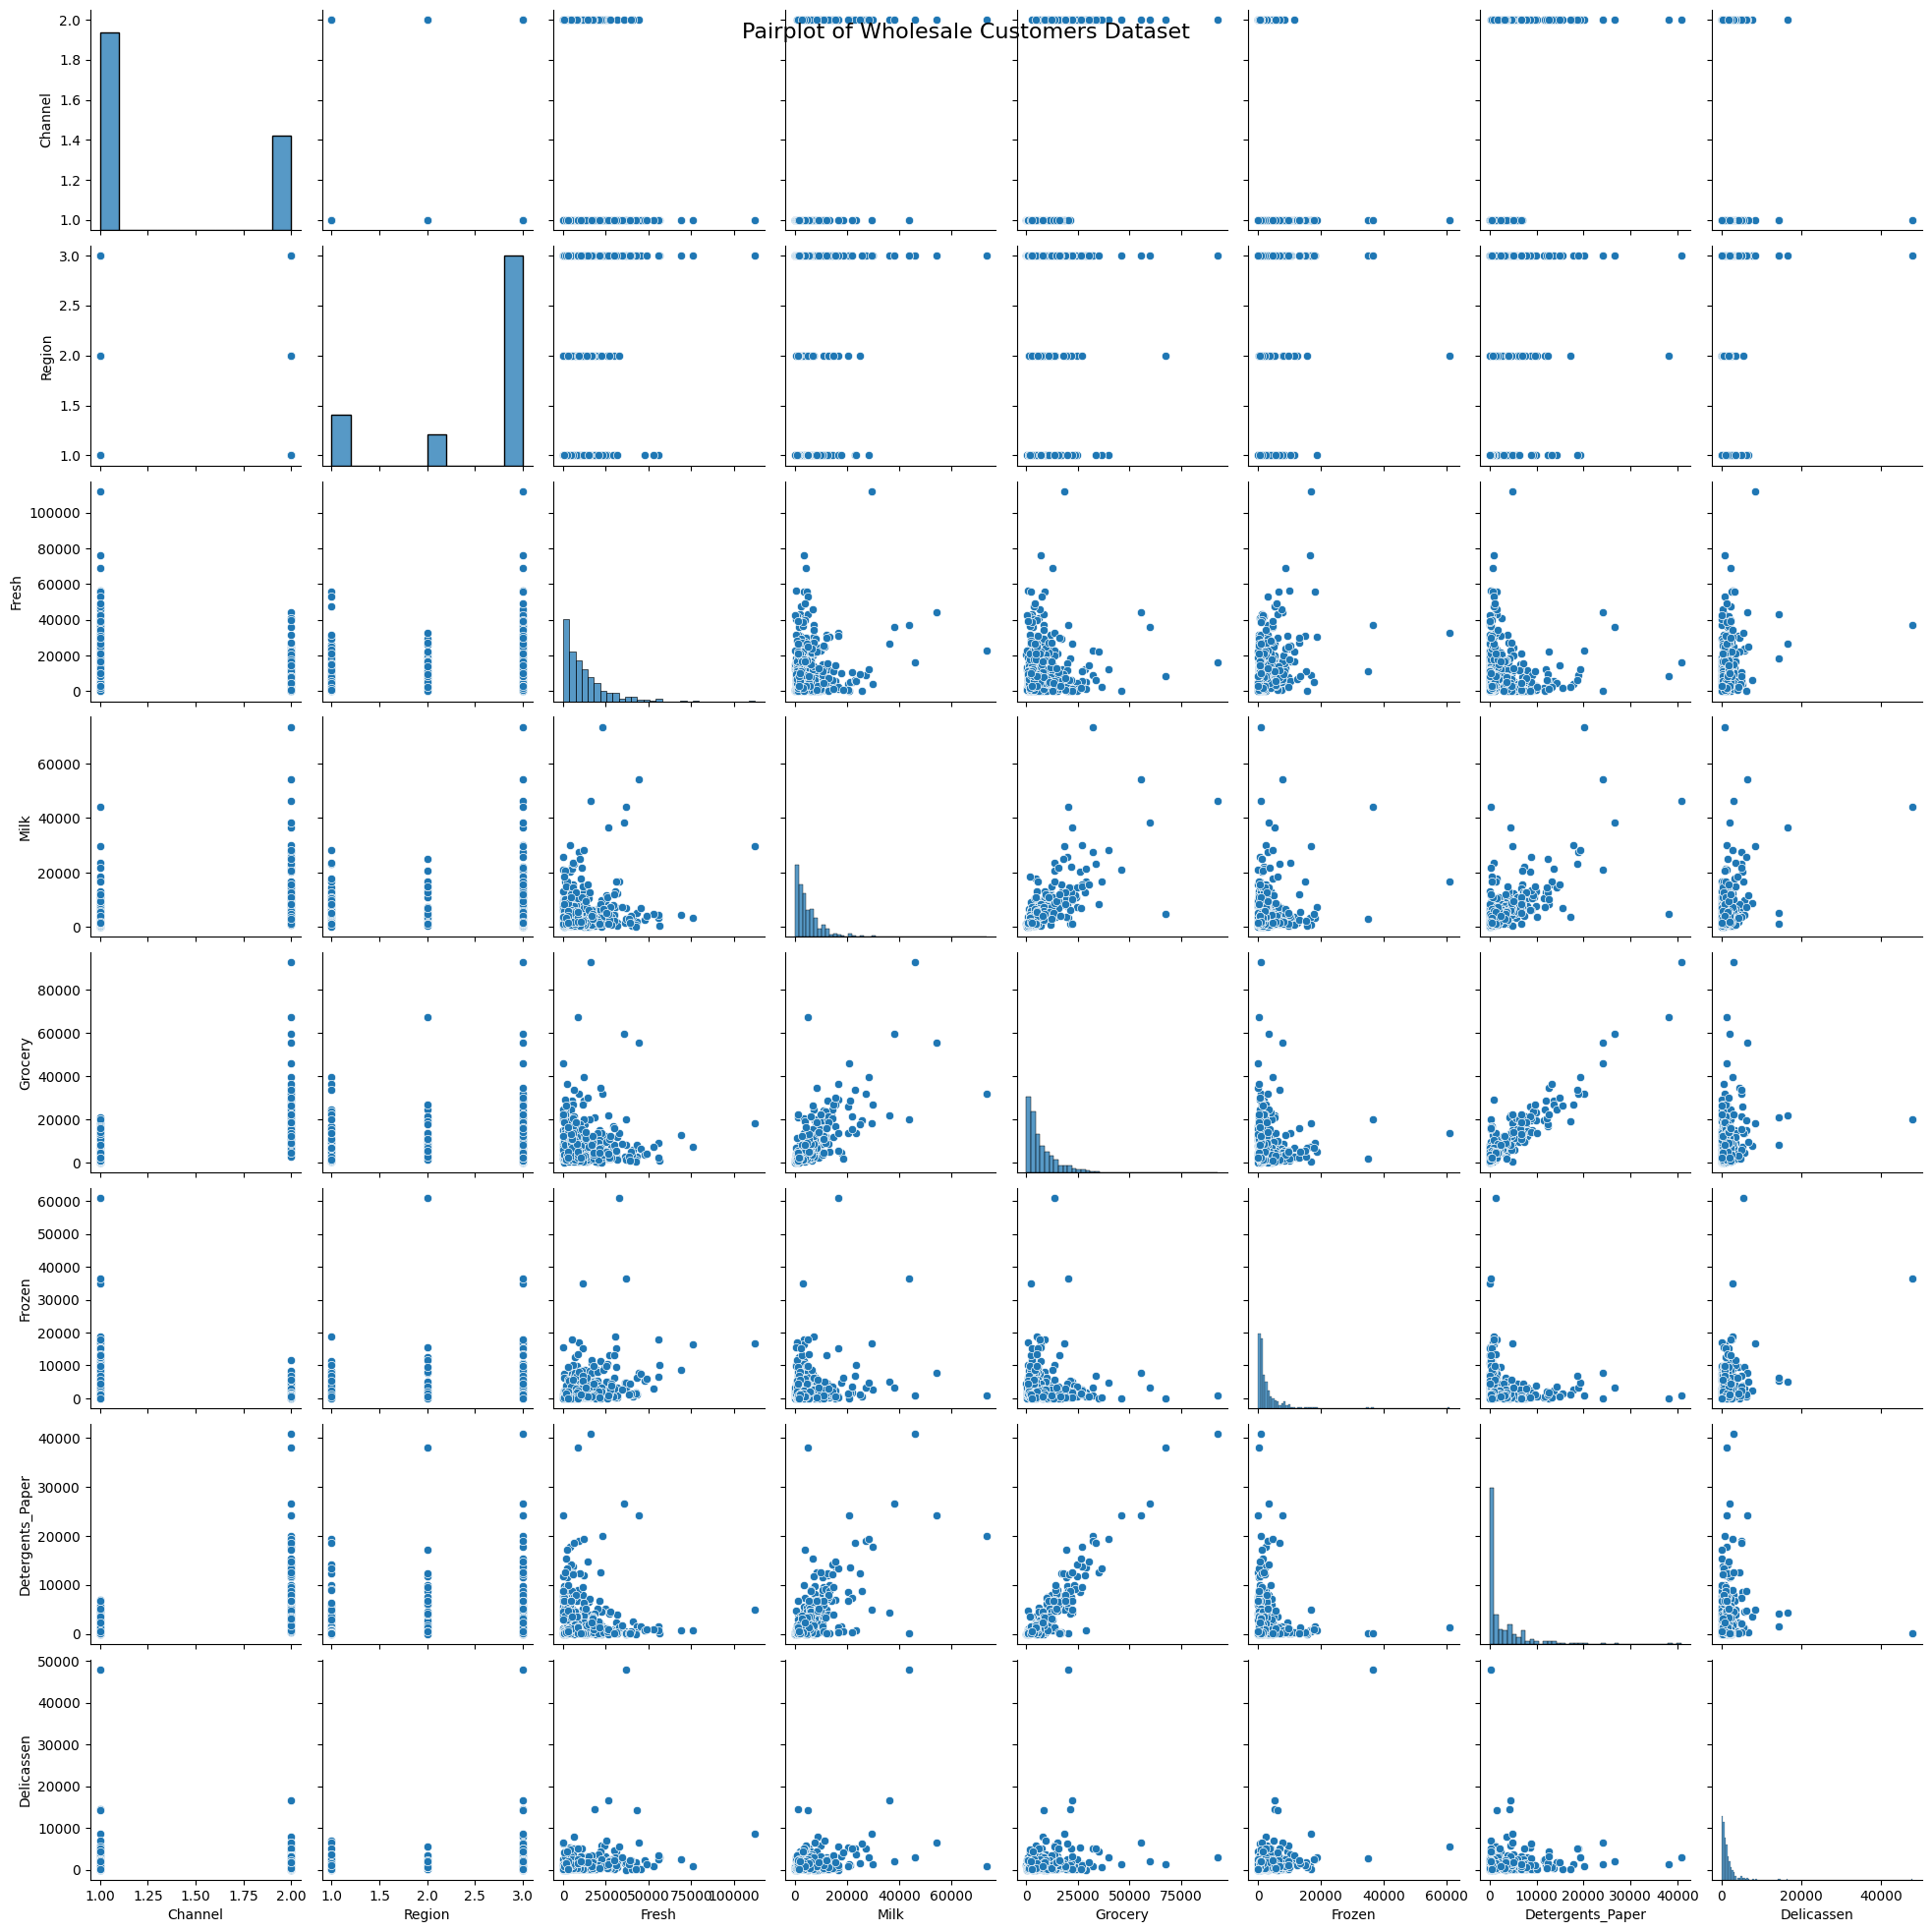

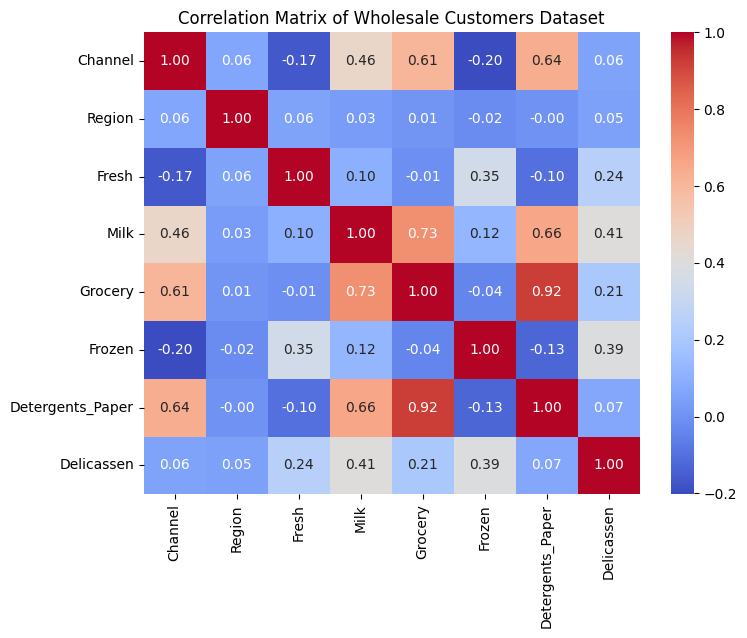

<Figure size 1000x600 with 0 Axes>

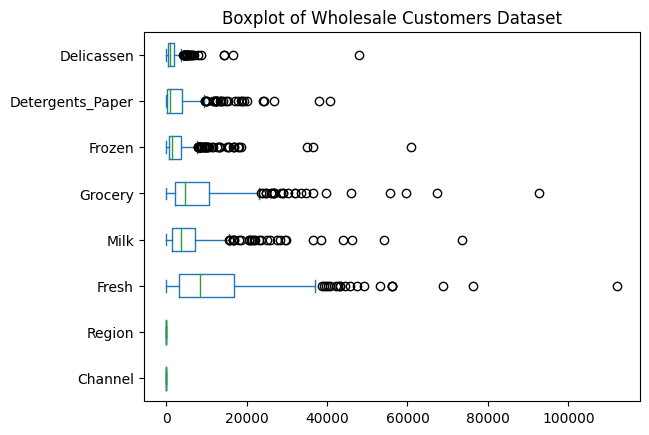

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
def load_iris_data():
    iris_data = load_iris()
    iris_df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
    iris_df['target'] = iris_data.target
    return iris_df
def load_wholesale_data(file_path):
    wholesale_df = pd.read_csv("/content/Wholesale customers data.csv")
    return wholesale_df
def explore_dataset(df, title):
    print(f"Exploratory Data Analysis for: {title}\n")
    print("Summary Statistics:")
    display(df.describe())

    sns.pairplot(df, hue='target' if 'target' in df else None)
    plt.suptitle(f'Pairplot of {title}', size=16)
    plt.show()
    plt.figure(figsize=(8, 6))
    sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
    plt.title(f'Correlation Matrix of {title}')
    plt.show()
    plt.figure(figsize=(10, 6))
    df.plot(kind='box', vert=False)
    plt.title(f'Boxplot of {title}')
    plt.show()
iris_df = load_iris_data()
wholesale_df = load_wholesale_data('/path/to/your/wholesale/data.csv')
explore_dataset(iris_df.drop('target', axis=1), 'Iris Dataset')
explore_dataset(wholesale_df, 'Wholesale Customers Dataset')


Implementing Clustering Algorithms

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

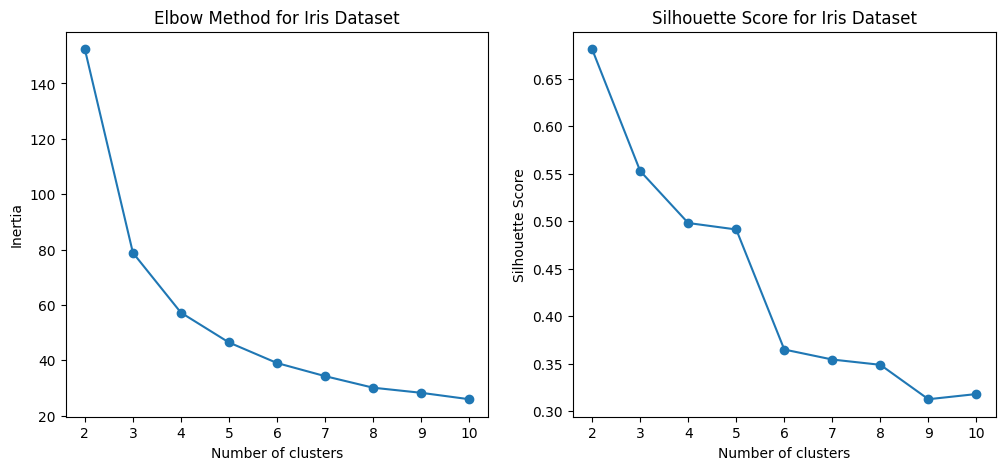

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

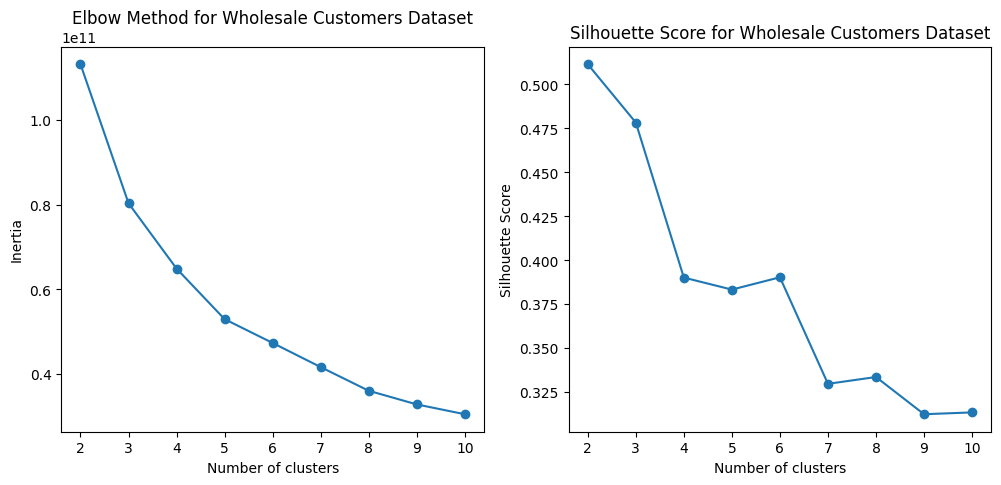

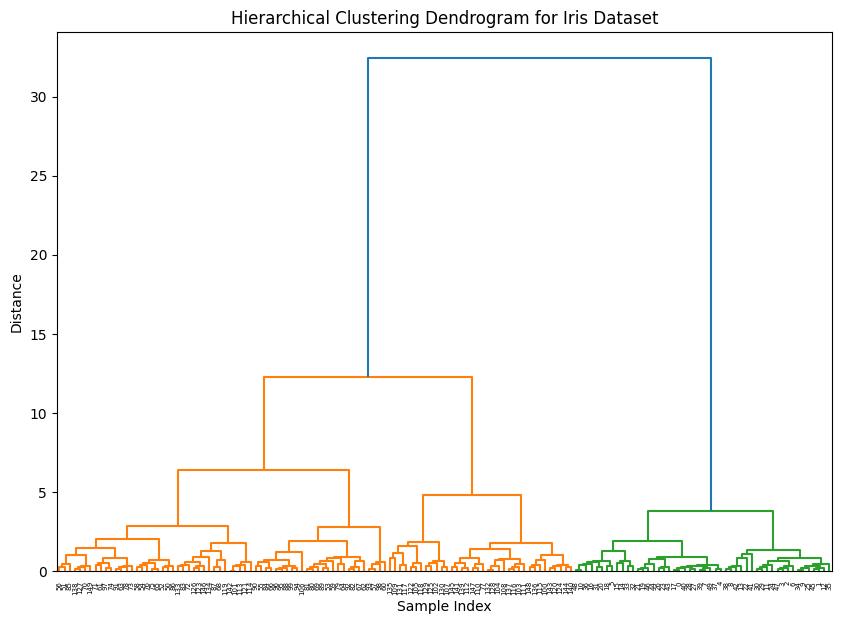

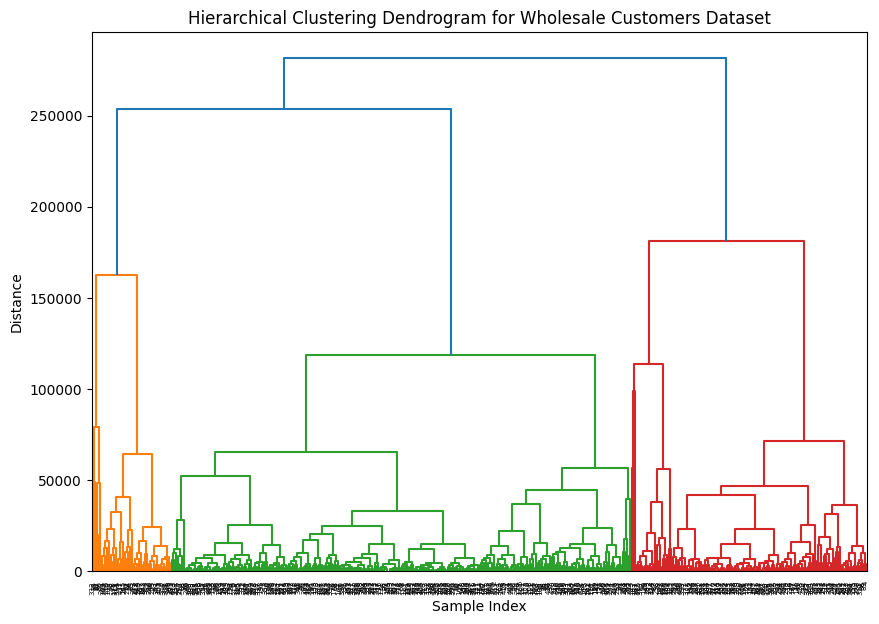

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
def optimal_clusters(df, dataset_title):
    inertia = []
    silhouette = []
    k_values = range(2, 11)
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(df)
        inertia.append(kmeans.inertia_)
        silhouette.append(silhouette_score(df, kmeans.labels_))
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(k_values, inertia, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title(f'Elbow Method for {dataset_title}')
    plt.subplot(1, 2, 2)
    plt.plot(k_values, silhouette, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.title(f'Silhouette Score for {dataset_title}')
    plt.show()
def hierarchical_clustering(df, title, method='ward'):
    linked = linkage(df, method=method)
    plt.figure(figsize=(10, 7))
    dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
    plt.title(f'Hierarchical Clustering Dendrogram for {title}')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()
iris_df = load_iris_data()
wholesale_df = load_wholesale_data('/path/to/your/wholesale/data.csv')
optimal_clusters(iris_df.drop('target', axis=1), 'Iris Dataset')
optimal_clusters(wholesale_df, 'Wholesale Customers Dataset')
hierarchical_clustering(iris_df.drop('target', axis=1), 'Iris Dataset', 'ward')
hierarchical_clustering(wholesale_df, 'Wholesale Customers Dataset', 'ward')

 Cluster Visualization and Interpretation

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


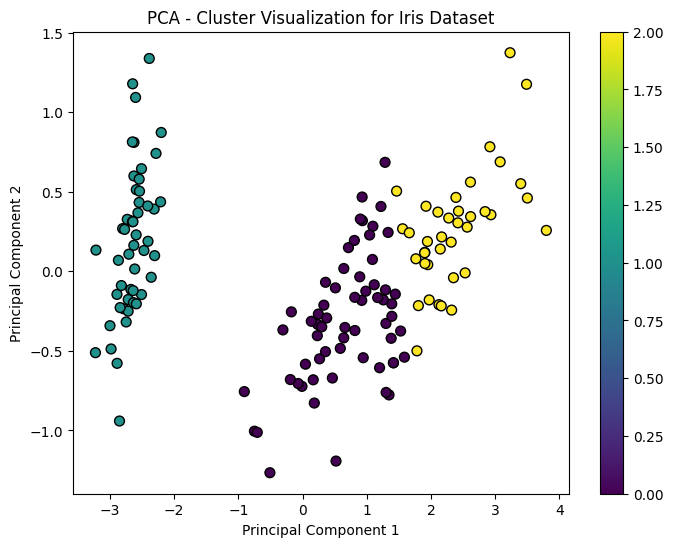

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


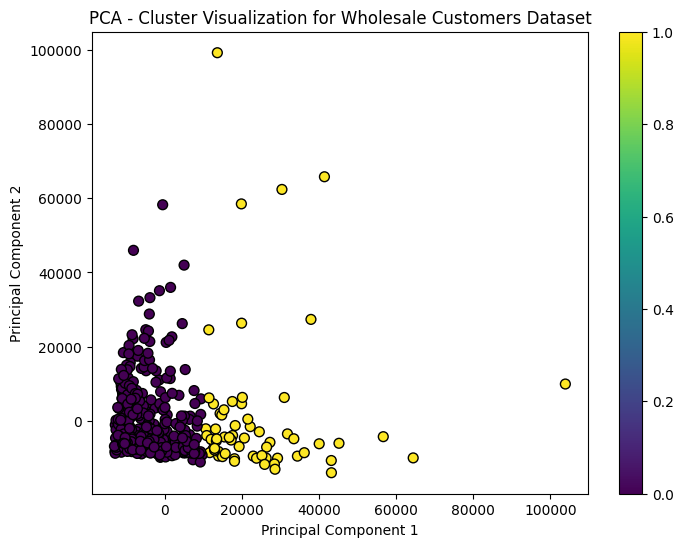

Silhouette Score for Iris Dataset: 0.5528190123564095
Davies-Bouldin Index for Iris Dataset: 0.6619715465007465
Silhouette Score for Wholesale Customers Dataset: 0.5115333882980367
Davies-Bouldin Index for Wholesale Customers Dataset: 1.129306487400179


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
def pca_and_visualize_clusters(df, model, title):
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(df)
    labels = model.fit_predict(df)
    plt.figure(figsize=(8, 6))
    plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='viridis', edgecolor='k', s=50)
    plt.title(f'PCA - Cluster Visualization for {title}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar()
    plt.show()
    return labels, pca_result
def compare_clustering_results(df, labels, title):
    silhouette = silhouette_score(df, labels)
    davies_bouldin = davies_bouldin_score(df, labels)
    print(f'Silhouette Score for {title}: {silhouette}')
    print(f'Davies-Bouldin Index for {title}: {davies_bouldin}')
iris_df = load_iris_data()
wholesale_df = load_wholesale_data('/path/to/your/wholesale/data.csv')
kmeans_iris = KMeans(n_clusters=3, random_state=42)
kmeans_wholesale = KMeans(n_clusters=2, random_state=42)
labels_iris, _ = pca_and_visualize_clusters(iris_df.drop('target', axis=1), kmeans_iris, 'Iris Dataset')
labels_wholesale, _ = pca_and_visualize_clusters(wholesale_df, kmeans_wholesale, 'Wholesale Customers Dataset')
compare_clustering_results(iris_df.drop('target', axis=1), labels_iris, 'Iris Dataset')
compare_clustering_results(wholesale_df, labels_wholesale, 'Wholesale Customers Dataset')

Exploratory Analysis and Insights

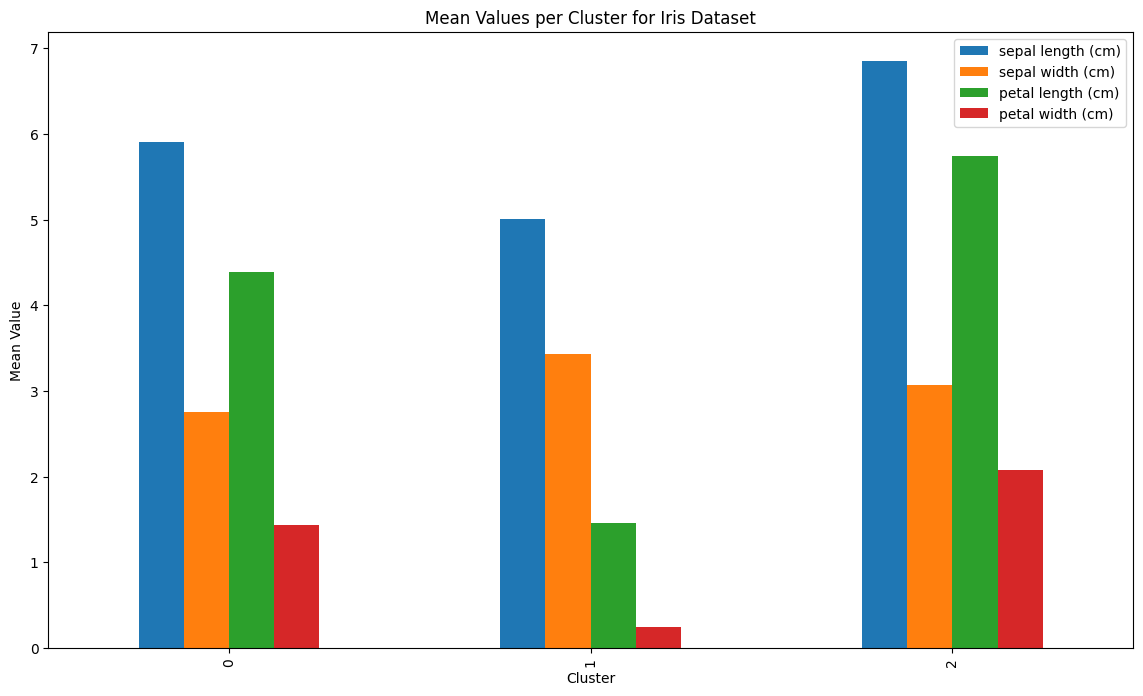

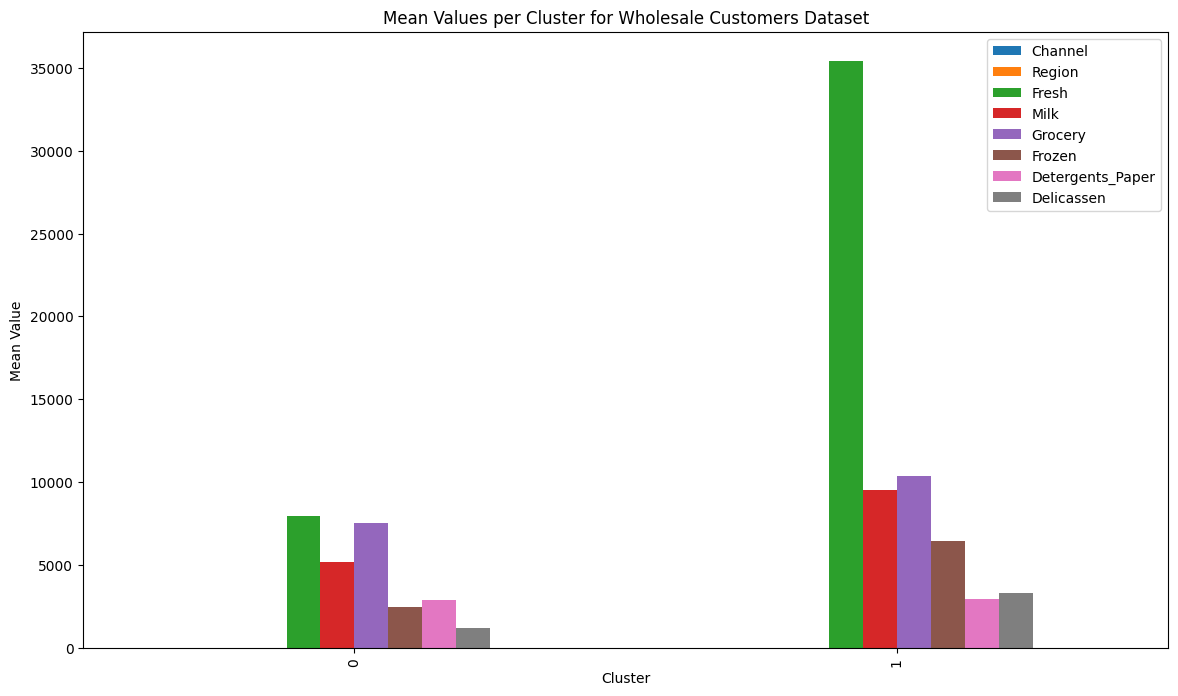

In [39]:
def analyze_clusters(df, labels, features, dataset_title):
    cluster_df = df.copy()
    cluster_df['Cluster'] = labels
    cluster_means = cluster_df.groupby('Cluster').mean()
    cluster_means.plot(kind='bar', figsize=(14, 8))
    plt.title(f'Mean Values per Cluster for {dataset_title}')
    plt.ylabel('Mean Value')
    plt.xlabel('Cluster')
    plt.show()
    return cluster_means
iris_cluster_analysis = analyze_clusters(iris_df.drop('target', axis=1), labels_iris, iris_df.columns[:-1], 'Iris Dataset')
wholesale_cluster_analysis = analyze_clusters(wholesale_df, labels_wholesale, wholesale_df.columns, 'Wholesale Customers Dataset')

In [42]:
from scipy.cluster.hierarchy import fcluster
def explore_clustering_parameters(df, features, range_clusters, linkage_methods, dataset_title):
    for k in range_clusters:
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(df[features])
        silhouette = silhouette_score(df[features], labels)
        print(f'{dataset_title} - K-Means with {k} clusters: Silhouette Score = {silhouette}')
    for method in linkage_methods:
        linked = linkage(df[features], method=method)
        labels = fcluster(linked, t=k, criterion='maxclust')
        silhouette = silhouette_score(df[features], labels)
        print(f'{dataset_title} - Hierarchical Clustering with {method} linkage: Silhouette Score = {silhouette}')
explore_clustering_parameters(iris_df, iris_df.columns[:-1], range(2, 6), ['ward', 'complete', 'average', 'single'], 'Iris Dataset')
explore_clustering_parameters(wholesale_df, wholesale_df.columns, range(2, 6), ['ward', 'complete', 'average', 'single'], 'Wholesale Customers Dataset')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

Iris Dataset - K-Means with 2 clusters: Silhouette Score = 0.6810461692117462
Iris Dataset - K-Means with 3 clusters: Silhouette Score = 0.5528190123564095
Iris Dataset - K-Means with 4 clusters: Silhouette Score = 0.49805050499728737
Iris Dataset - K-Means with 5 clusters: Silhouette Score = 0.49123997967644784
Iris Dataset - Hierarchical Clustering with ward linkage: Silhouette Score = 0.48438258927905953
Iris Dataset - Hierarchical Clustering with complete linkage: Silhouette Score = 0.3461739693026953
Iris Dataset - Hierarchical Clustering with average linkage: Silhouette Score = 0.4306699739542554
Iris Dataset - Hierarchical Clustering with single linkage: Silhouette Score = 0.2838119645524374
Wholesale Customers Dataset - K-Means with 2 clusters: Silhouette Score = 0.5115333882980367
Wholesale Customers Dataset - K-Means with 3 clusters: Silhouette Score = 0.4783511411368133
Wholesale Customers Dataset - K-Means with 4 clusters: Silhouette Score = 0.3901291340789497
Wholesale Cus

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Comparison and Reporting

Iris Dataset: Both K-Means and Hierarchical Clustering are effective, but K-Means may edge out due to its simplicity and direct alignment with the natural clusters in the data.

Wholesale Customers Dataset: Hierarchical Clustering might be more appropriate due to its ability to handle complex and hierarchically structured data better than K-Means. It offers insights into various levels of data aggregation, which is beneficial in understanding customer segmentation more deeply.

The choice between K-Means and Hierarchical Clustering should be influenced by the specific characteristics of the dataset and the analytical needs. Hierarchical clustering's flexibility with different linkage criteria and the ability to visualize cluster formations at different resolutions often make it more suitable for exploratory data analysis where relationships within the data are not straightforward or well understood. In contrast, K-Means provides a more straightforward, efficient approach for datasets with clear, separable clusters.

https://medium.com/@yasirbhtt2/comprehensive-article-on-clustering-analysis-of-iris-and-wholesale-customers-datasets-0be8e5f72f37